In [2]:
%cd ..

c:\Users\calag\Desktop\nlp-proyecto7-pc3


In [3]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from src.vit_encoder import ViTEncoder
from src.text_encoder import TextEncoder
from src.multimodal_decoder import MultimodalDecoder

c:\Users\calag\Desktop\nlp-proyecto7-pc3\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# 1.CARGAR EL MODELO Y CONFIGURAR
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vit = ViTEncoder().to(device)
text_encoder = TextEncoder(device=device)
decoder = MultimodalDecoder().to(device)

c:\Users\calag\Desktop\nlp-proyecto7-pc3\venv\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
# 2. IMAGEN DE ENTRADA (CUIDANDO BIEN LA UBICACIÓN DE LA IMAGEN)
img_path = 'samples/dog_mio.png'  # agrega imágenes reales aquí
image = Image.open(img_path).convert("RGB")

In [ ]:
# 3. TRANSFORMAR IMAGEN
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])
img_tensor = transform(image).unsqueeze(0).to(device)

In [ ]:
# 4. OBTENER EMBBEDINGS VISUALES
img_embeds = vit(img_tensor)  # (1, 49, 768)

In [ ]:
# 5. TEXTO DE ENTRADA (SIMULACIÓN DEL INICIO DE CAPTION)
texts = ["a photo of"]  # PROMPT DE INICIO
text_embeds = text_encoder(texts)  # (1, L, 768)

In [ ]:
# 6. GENERAR LOGITS
with torch.no_grad():
    logits = decoder(text_embeds, img_embeds)

In [ ]:
# 7. ELEGIR PALABRA MÁS PROBABLE
pred_ids = torch.argmax(logits, dim=-1)[0]
print("Token IDs predichos:", pred_ids)

Token IDs predichos: tensor([20354, 23107, 23832, 26884,  7589])


In [ ]:
# 8. DECODIFICAR USANDO TOKENIZER
from transformers import DistilBertTokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
caption_words = tokenizer.convert_ids_to_tokens(pred_ids)
caption = tokenizer.convert_tokens_to_string(caption_words)

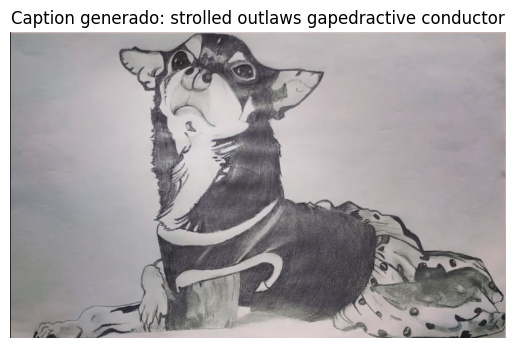

In [ ]:
# 9. MOSTRAR IMAGEN Y CAPTION GENERADO
plt.imshow(image)
plt.title(f"Caption generado: {caption}")
plt.axis('off')
plt.show()